In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import os

plt.style.use("science.mplstyle")
import pickle 

from helpers.synthesis import *
from helpers.visualization import *


dpi = 800

In [3]:
with open('log_posterior.npy', 'rb') as f:
    to_plot_central = np.load(f)
    to_plot_err = np.load(f)



In [14]:
colors_dict = {"full_sup":"grey",
               "salad": "#009E73",
               "feta": "#CC79A7",
               "cathode":"#D55E00",
               "curtains":"#E69F00",
                "combined": "#e41a1c",
               "combined_scores": "#0072B2",
                "ideal_ad":"#56B4E9"}

labels_dict = {"full_sup":"Fully Supervised",
               "salad": "SALAD",
               "feta": "FETA",
               "cathode":"CATHODE",
               "curtains":"CURTAINs",
                "combined": "Combined (Events)",
               "combined_scores": "Combined (Scores)",
              "ideal_ad": "Ideal. AD"}

hatches_dict = {"full_sup":"Full. Sup. ",
               "salad": "\\",
               "feta": "/",
               "cathode":"-",
               "curtains":"|",
                "combined": "++",
            "combined_scores": "++"}


l = 3
f_1 = 20
f_2 = 30
alpha = 0.4



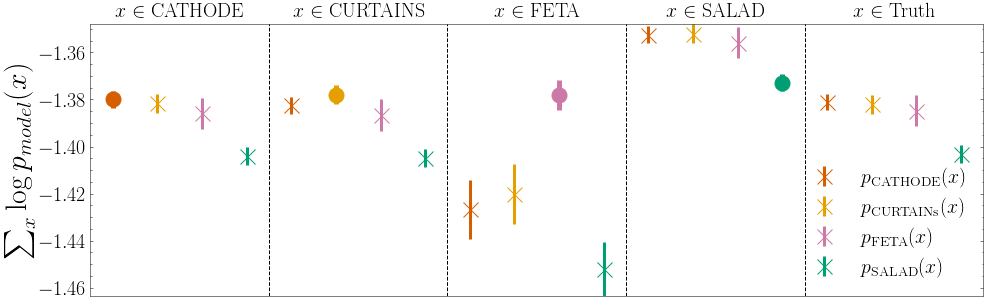

In [96]:
ymin, ymax = np.min(to_plot_central-to_plot_err), np.max(to_plot_central+to_plot_err)

order = ["cathode", "curtains", "feta", "salad"]


fig = plt.figure(figsize = (16, 5)) 

to_bold = [0, 5, 10, 15]
legends = ['$p_{\mathrm{CATHODE}}(x)$', '$p_{\mathrm{CURTAINs}}(x)$','$p_{\mathrm{FETA}}(x)$', '$p_{\mathrm{SALAD}}(x)$']
for i in range(20):
    
    if i in to_bold:
        plt.errorbar(i, to_plot_central[i], to_plot_err[i], fmt='o', color = colors_dict[order[i%4]],
                     elinewidth=5, markersize = 15 )
    elif i >= 16:
        plt.errorbar(i, to_plot_central[i], to_plot_err[i], fmt='x', color = colors_dict[order[i%4]], 
                     elinewidth=3, markersize = 15, label = legends[i-16] )

    else:
        plt.errorbar(i, to_plot_central[i], to_plot_err[i], fmt='x', color = colors_dict[order[i%4]], 
                     elinewidth=3, markersize = 15)

    
plt.vlines([3.5, 7.5, 11.5, 15.5], ymin, ymax, ls='dashed', color='k')
plt.ylim((ymin, ymax))
plt.xlim((-0.5, 19.5))
plt.xticks([])
plt.yticks(fontsize = f_1)

plt.ylabel('$\sum_{x} \log{p_{model}(x)}$', fontsize = f_2)



plt.text(1.5, -1.345, '$x \in$ CATHODE', ha='center', fontsize = f_1)
plt.text(5.5, -1.345, '$x \in$ CURTAINS', ha='center', fontsize = f_1)
plt.text(9.5, -1.345, '$x \in$ FETA', ha='center', fontsize = f_1)
plt.text(13.5, -1.345, '$x \in$ SALAD', ha='center', fontsize = f_1)
plt.text(17.5, -1.345, '$x \in$ Truth', ha='center', fontsize = f_1)

plt.legend(fontsize = f_1, loc = "lower right")


fig.savefig(f"plots/discrim_methods.pdf", dpi = dpi)

plt.show()


